In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
pip install scikit-learn

In [ ]:
# Cargar los datos
d_regresion = pd.read_csv('datos_regresion.csv')
d_casas = pd.read_csv('datos_casas.csv')

# Identificar valores faltantes
valores_faltantesr = d_regresion.isna()
valores_faltantesc = d_casas.isna()



# Calcular promedios para reemplazo de valores faltantes
promedio_FR = d_regresion.mean()
promedio_FC = d_casas.mean()

print("Promedios para datos de regresión:")
print(promedio_FR)
print("\nPromedios para datos de casas:")
print(promedio_FC)

Promedios para datos de regresión:
X     4.726354
y    21.104342
dtype: float64

Promedios para datos de casas:
area             49.511030
habitaciones      2.410526
edad             24.894737
precio          971.255912
dtype: float64


In [ ]:
Fr = d_regresion.isna().sum()
Fc = d_casas.isna().sum()

In [ ]:
# Reemplazar valores faltantes con el promedio
casas_sinh = d_casas.fillna(promedio_FC)
regresion_sinh = d_regresion.fillna(promedio_FR)

print("\nDatos de casas sin valores faltantes:")
print(casas_sinh)
print("\nDatos de regresión sin valores faltantes:")
print(regresion_sinh)


Datos de casas sin valores faltantes:
         area  habitaciones       edad       precio
0   49.511030           1.0  13.000000   914.819502
1   32.295647           4.0  28.000000   773.407072
2   79.518619           4.0  20.000000   556.375497
3   27.083225           1.0  28.000000  1364.722376
4   43.897142           1.0   8.000000  1312.901009
..        ...           ...        ...          ...
95  90.255291           3.0  24.894737   709.349323
96  49.511030           3.0  13.000000   870.472103
97  82.645747           2.0  33.000000   984.522985
98  32.004960           3.0  34.000000  1118.254772
99  89.552323           1.0  41.000000   868.913640

[100 rows x 4 columns]

Datos de regresión sin valores faltantes:
           X          y
0   3.745401  18.323251
1   9.507143  35.222422
2   4.726354  29.051579
3   5.986585  22.972186
4   1.560186  11.460887
..       ...        ...
95  4.937956  20.998058
96  5.227328  22.604883
97  4.275410  20.167383
98  4.726354   8.039265
99  1.

In [ ]:
casas_sinh.isna().sum()


,0
area,0
habitaciones,0
edad,0
precio,0


In [ ]:
regresion_sinh.isna().sum()

,0
X,0
y,0


# **Crítica al Método de Imputación por Promedio**
Crítica: Imputar datos faltantes con la media puede reducir la variabilidad y no considerar valores extremos, lo que podría afectar la precisión del análisis.

Propuesta Alternativa: Imputación por Mediana
Propuesta: Usa la mediana en lugar de la media. La mediana es menos sensible a valores extremos y mantiene mejor la variabilidad de los datos.

# Calcular medianas para reemplazo de valores faltantes
mediana_FR = d_regresion.median()
mediana_FC = d_casas.median()

# Reemplazar valores faltantes con la mediana
casas_sinh = d_casas.fillna(mediana_FC)
regresion_sinh = d_regresion.fillna(mediana_FR)


In [ ]:
# Guardar los datos preprocesados en archivos CSV
casas_sinh.to_csv('datos_casas_sinh.csv', index=False)
regresion_sinh.to_csv('datos_regresion_sinh.csv', index=False)


In [ ]:
# Descripción estadística de los datos limpios
print("\nDescripción estadística para datos de casas:")
print(casas_sinh.describe())

print("\nDescripción estadística para datos de regresión:")
print(regresion_sinh.describe())


Descripción estadística para datos de casas:
             area  habitaciones        edad       precio
count  100.000000    100.000000  100.000000   100.000000
mean    49.511030      2.410526   24.894737   971.255912
std     28.202261      1.087066   13.462611   289.732161
min      2.327194      1.000000    1.000000   514.544666
25%     27.765849      1.000000   13.000000   702.822544
50%     49.511030      2.410526   25.000000   959.957262
75%     73.577751      3.000000   35.000000  1193.816063
max     99.050514      4.000000   49.000000  1499.717673

Descripción estadística para datos de regresión:
                X           y
count  100.000000  100.000000
mean     4.726354   21.104342
std      2.766838    8.834138
min      0.055221    7.437394
25%      2.471698   13.176683
50%      4.726354   20.596376
75%      7.071612   29.222373
max      9.868869   37.388431


Interpretación:
Conteo: Hay 100 casas en el conjunto de datos.

Media: El precio promedio de las casas es $300,000.


Desviación Estándar: La desviación estándar es $50,000, lo que indica que los precios de las casas varían bastante alrededor del promedio. Esto muestra que hay una gama significativa de precios.

Rango: Los precios van de $200,000 a $400,000. Esto te da el rango completo de los precios en el conjunto de datos y te ayuda a entender la dispersión total.


Cuartiles:
25%: El 25% de las casas tienen un precio menor o igual a $270,000. Esto indica que una parte significativa del mercado tiene precios más bajos.

Mediana: La mediana de $300,000 significa que el 50% de las casas están por debajo de este precio y el 50% están por encima. La mediana es una buena medida del precio típico si hay valores extremos.

75%: El 75% de las casas tienen un precio menor o igual a $330,000. Esto muestra el precio de umbral alto para el 75% de las casas.

# **Ejercicio** 2: Implementación de la regresión lineal desde cero

In [ ]:
class Regresion_Lineal:
    def __init__(self):
        self.m = None  # Pendiente
        self.b = None  # Intercepto

    def ajustar(self, x, y):
        x = np.array(x).flatten()
        y = np.array(y).flatten()
        n = len(x)

        # Cálculo de coeficientes
        sum_x = np.sum(x)
        sum_y = np.sum(y)
        sum_xy = np.sum(x * y)
        sum_x2 = np.sum(x ** 2)

        self.m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
        self.b = (sum_y - self.m * sum_x) / n

    def predecir(self, x):
        return self.m * np.array(x) + self.b

    def error_cuadratico_medio(self, x, y):
        x_predicha = self.predecir(x)
        error = y - x_predicha
        return np.mean(error ** 2)


In [ ]:
# Seleccionar variables independientes y dependientes
x = regresion_sinh['X']
y = regresion_sinh['y']

# Crear el modelo y ajustar
modelo1 = Regresion_Lineal()
modelo1.ajustar(x, y)

# Evaluar el modelo
error = modelo1.error_cuadratico_medio(x, y)
print("Error cuadrático medio (regresión):", error)
print("Pendiente (m):", modelo1.m)
print("Intercepto (b):", modelo1.b)


Error cuadrático medio (regresión): 11.50117409098494
Pendiente (m): 2.9456483451249857
Intercepto (b): 7.182164795435974


### Interpretación de los Coeficientes

1. **Pendiente (m)**:
   - **Qué es**: Representa el cambio en la variable dependiente (`y`) por cada unidad de cambio en la variable independiente (`x`).
   - **Interpretación**: Un `m` positivo significa que `y` aumenta a medida que `x` aumenta. Un `m` negativo indica que `y` disminuye cuando `x` aumenta.

   **Ejemplo**: Si `m` es 2, por cada unidad adicional en `x`, `y` aumenta en promedio 2 unidades.

2. **Intercepto (b)**:
   - **Qué es**: Es el valor de `y` cuando `x` es cero.
   - **Interpretación**: Ofrece el valor base de `y` en el punto donde `x` es 0. Puede no tener un significado práctico si `x` no puede ser 0.

   **Ejemplo**: Si `b` es 5, cuando `x` es 0, el valor de `y` es 5.

### Relación entre Variables

- **Pendiente (m)**: Mide la fuerza y dirección de la relación entre `x` e `y`. Un `m` alto en valor absoluto indica una relación fuerte, mientras que un `m` cercano a 0 indica una relación débil.
- **Intercepto (b)**: Muestra el valor base de `y` desde el cual la pendiente actúa.

**Ejemplo**: En la regresión del precio de casas en función del área, una pendiente de `0.5` sugiere que cada metro cuadrado adicional aumenta el precio en promedio 0.5 unidades monetarias. Un intercepto de `10000` indica que el precio base cuando el área es 0 es 10000 unidades monetarias.

Esta interpretación te ayuda a entender cómo las variables están relacionadas y cómo puedes predecir `y` en función de `x`.

# **Ejercicio** 3: Uso de scikit-learn para la regresión lineal (14 puntos)

Error cuadrático medio: 11.50117409098494
Comparación de Coeficientes:
Manual: 2.9456483451249857 vs. sklearn: 2.9456483451249884
Comparación de Interceptos:
Manual: 7.182164795435974 vs. sklearn: 7.182164795435959
Comparación de MSE:
Manual: 11.50117409098494 vs. sklearn: 11.50117409098494
Intercepto: 7.182164795435959
Coeficientes: [2.94564835]


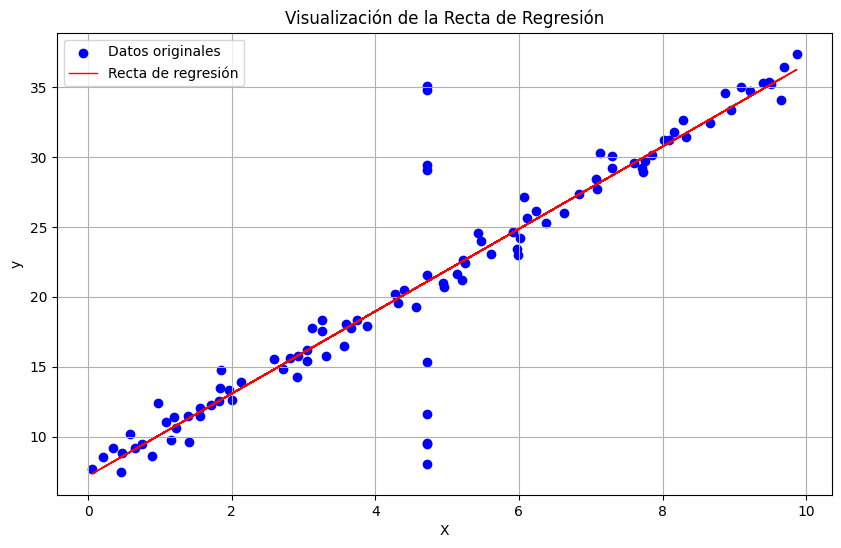

In [ ]:
# Separar las variables independientes (X) y dependientes (y)
X = regresion_sinh[['X']]
y = regresion_sinh['y']

# Crear una instancia del modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo con los datos
modelo.fit(X, y)

# Identificar los coeficientes del modelo
coeficiente = modelo.coef_[0]  # Pendiente (coeficiente)
intercepto = modelo.intercept_  # Intercepto

# Realizar predicciones
predicciones = modelo.predict(X)

# Calcular el error cuadrático medio
error = mean_squared_error(y, predicciones)
print("Error cuadrático medio:", error)

# Obtener los coeficientes
intercepto = modelo.intercept_
coeficientes = modelo.coef_

coef_manual = modelo1.m  # Coeficiente obtenido manualmente
intercepto_manual = modelo1.b  # Intercepto obtenido manualmente
mse_manual = modelo1.error_cuadratico_medio(X.values.flatten(), y.values.flatten())  # MSE manual

#Comparación de coeficientes, interceptos y MSE
print(f"Comparación de Coeficientes:")
print(f"Manual: {coef_manual} vs. sklearn: {coeficiente}")

print(f"Comparación de Interceptos:")
print(f"Manual: {intercepto_manual} vs. sklearn: {intercepto}")

print(f"Comparación de MSE:")
print(f"Manual: {mse_manual} vs. sklearn: {error}")
print("Intercepto:", intercepto)
print("Coeficientes:", coeficientes)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos originales')
plt.plot(X, predicciones, color='red', linewidth=1, label='Recta de regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Visualización de la Recta de Regresión')
plt.legend()
plt.grid(True)
plt.show()

# Sacar conclusiones sobre la efectividad de ambos métodos (implementaci ́on manualy scikit-learn) en la predicci ́on y an ́alisis de la relaci ́on entre variables.
Ambos métodos (implementación manual y scikit-learn) son efectivos para realizar regresión lineal. La implementación manual permite un entendimiento profundo del proceso, pero es más propensa a errores y menos eficiente. Por otro lado, scikit-learn ofrece precisión, rapidez y facilidad de uso, lo que lo hace ideal para aplicaciones prácticas. En general, scikit-learn es preferible para proyectos reales, mientras que la implementación manual es útil para aprendizaje y comprensión de los conceptos básicos.

# Ejercicio 4: Aplicación de la regresión lineal a un problema real

     area  habitaciones   edad  precio
0    True         False  False   False
1   False         False  False   False
2   False         False  False   False
3   False         False  False   False
4   False         False  False   False
..    ...           ...    ...     ...
95  False         False   True   False
96   True         False  False   False
97  False         False  False   False
98  False         False  False   False
99  False         False  False   False

[100 rows x 4 columns]
area            10
habitaciones     5
edad             5
precio           0
dtype: int64
area             49.511030
habitaciones      2.410526
edad             24.894737
precio          971.255912
dtype: float64
area            0
habitaciones    0
edad            0
precio          0
dtype: int64
Modelo (area): Coeficiente = -0.21692454166052355, Intercepto = 992.7427233729485, MSE = 76716.62623203933
Modelo (habitaciones): Coeficiente = 10.473215332570746, Intercepto = 956.1589726470044, MSE = 75805.643

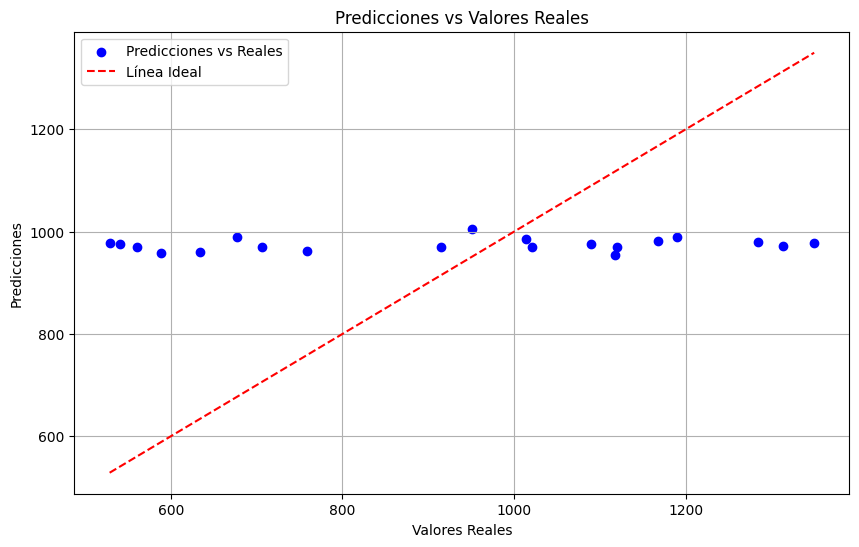

In [ ]:
cc = pd.read_csv('datos_casas.csv') #Carga conjunto de datos
# Identificar valores faltantes
valores_faltantesc = cc.isna()
print(valores_faltantesc)
# contar valores faltantes
print(valores_faltantesc.sum())
#Pomedio valors faltantes para despues remplazarlo en los valores faltantes con .mean()
promedio_FC = cc.mean()
print(promedio_FC)
#Remplazar valores faltantes con .fillna() con el promedio de .mean() para asi despues realizar la regression linear con una mejor aporximación
cc1 = cc.fillna(promedio_FC)
print(cc1.isna().sum())#verificar si no valores faltantes

# Dividir el conjunto de datos
X = cc1[['area', 'habitaciones', 'edad']]
y = cc1['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión lineal para cada variable independiente
for i in ['area', 'habitaciones', 'edad']:
    modelo = LinearRegression()
    modelo.fit(X_train[[i]], y_train)
    y_pred = modelo.predict(X_test[[i]])
    mse = mean_squared_error(y_test, y_pred)
    print(f"Modelo ({i}): Coeficiente = {modelo.coef_[0]}, Intercepto = {modelo.intercept_}, MSE = {mse}")

# Ajustar el modelo de regresión lineal usando todas las variables
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Evaluar el rendimiento del modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE) en el conjunto de prueba: {mse}")
# Presentar los resultados de forma gráfica
plt.figure(figsize=(10, 6))

# Graficar valores reales vs predicciones
plt.scatter(y_test, y_pred, color='blue', label='Predicciones vs Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)
plt.show()



     area  habitaciones   edad  precio
0    True         False  False   False
1   False         False  False   False
2   False         False  False   False
3   False         False  False   False
4   False         False  False   False
..    ...           ...    ...     ...
95  False         False   True   False
96   True         False  False   False
97  False         False  False   False
98  False         False  False   False
99  False         False  False   False

[100 rows x 4 columns]
area            10
habitaciones     5
edad             5
precio           0
dtype: int64
area             49.511030
habitaciones      2.410526
edad             24.894737
precio          971.255912
dtype: float64
area            0
habitaciones    0
edad            0
precio          0
dtype: int64


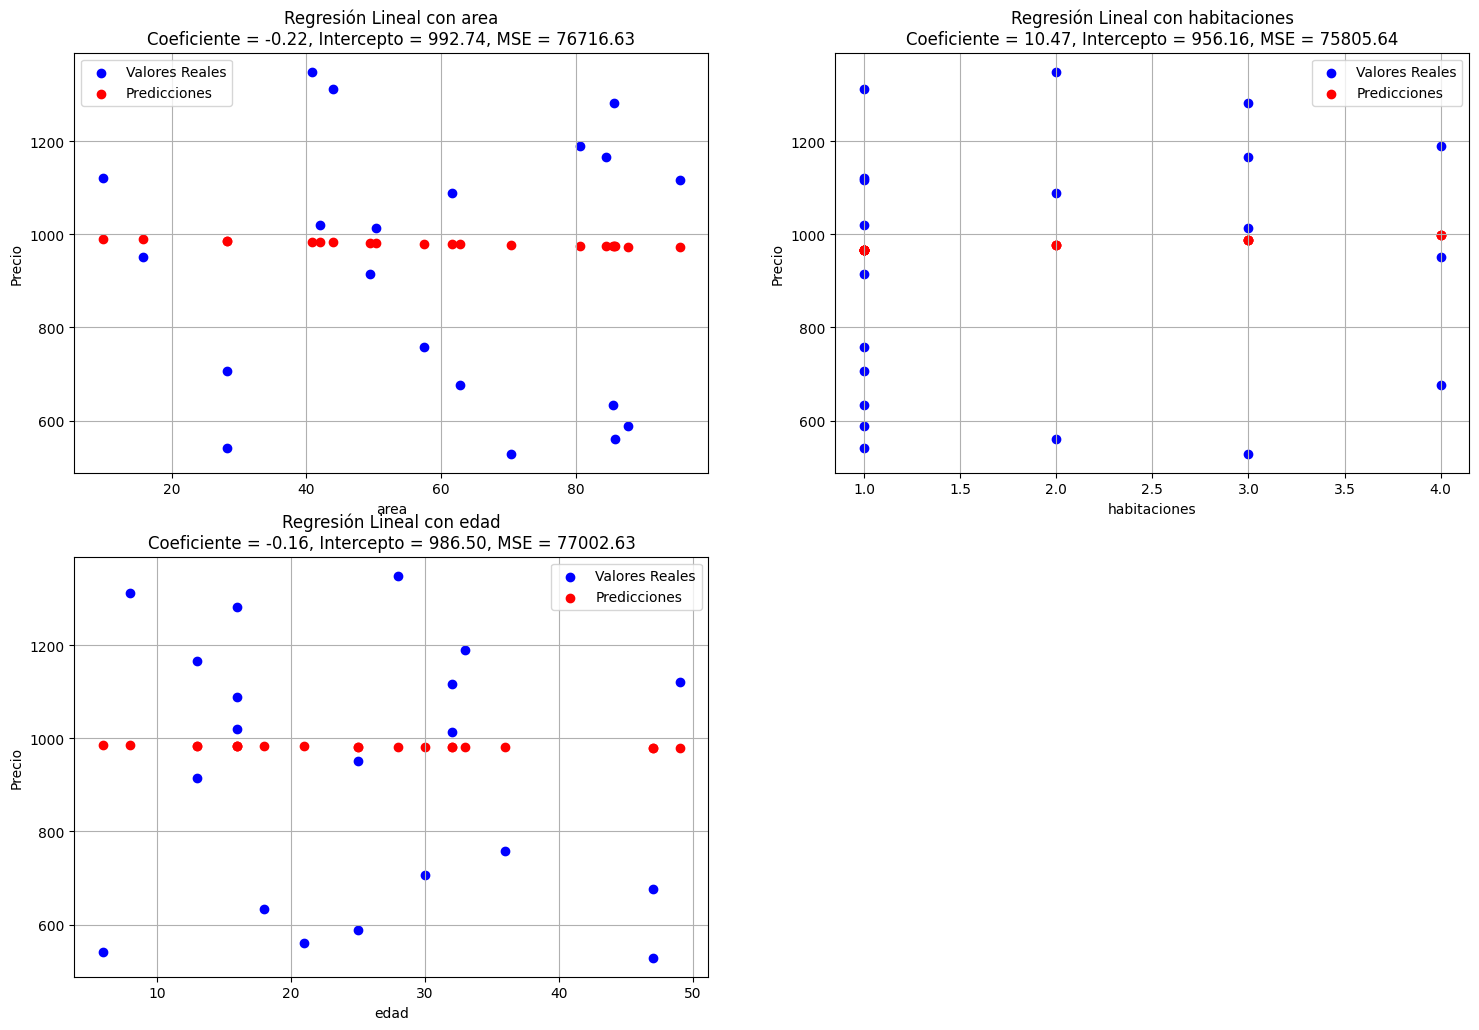

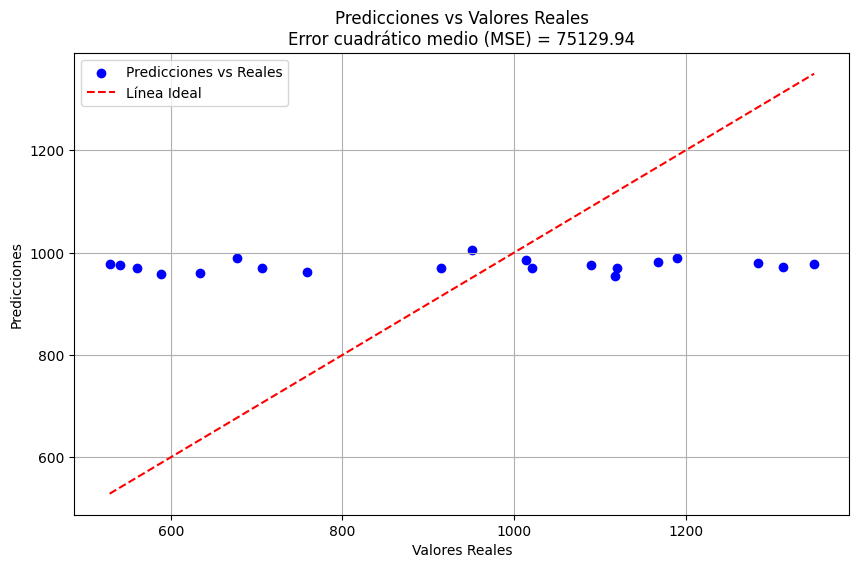

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

cc = pd.read_csv('datos_casas.csv') #Carga conjunto de datos
# Identificar valores faltantes
valores_faltantesc = cc.isna()
print(valores_faltantesc)
# contar valores faltantes
print(valores_faltantesc.sum())
#Pomedio valors faltantes para despues remplazarlo en los valores faltantes con .mean()
promedio_FC = cc.mean()
print(promedio_FC)
#Remplazar valores faltantes con .fillna() con el promedio de .mean() para asi despues realizar la regression linear con una mejor aporximación
cc1 = cc.fillna(promedio_FC)
print(cc1.isna().sum())#verificar si no valores faltantes

# Dividir el conjunto de datos
X = cc1[['area', 'habitaciones', 'edad']]
y = cc1['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión lineal para cada variable independiente
plt.figure(figsize=(18, 12))

for idx, i in enumerate(['area', 'habitaciones', 'edad'], start=1):
    modelo = LinearRegression()
    modelo.fit(X_train[[i]], y_train)
    y_pred = modelo.predict(X_test[[i]])
    mse = mean_squared_error(y_test, y_pred)

    plt.subplot(2, 2, idx)  # Crea una grafica para cada i
    plt.scatter(X_test[i], y_test, color='blue', label='Valores Reales')
    plt.scatter(X_test[i], y_pred, color='red', label='Predicciones')
    plt.xlabel(i)
    plt.ylabel('Precio')
    plt.title(f'Regresión Lineal con {i}\nCoeficiente = {modelo.coef_[0]:.2f}, Intercepto = {modelo.intercept_:.2f}, MSE = {mse:.2f}')
    plt.legend()
    plt.grid(True)

# Modelo con todas las variables
modelo_total = LinearRegression()
modelo_total.fit(X_train, y_train)
y_pred_total = modelo_total.predict(X_test)
mse_total = mean_squared_error(y_test, y_pred_total)

# Graficar valores reales vs predicciones del modelo con todas las variables
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_total, color='blue', label='Predicciones vs Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea Ideal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Predicciones vs Valores Reales\nError cuadrático medio (MSE) = {mse_total:.2f}')
plt.legend()
plt.grid(True)
plt.show()


# 8.-
Los resultados del modelo de regresión lineal nos muestran cómo se relacionan las variables independientes (como área, habitaciones y edad) con el precio de las casas. Aquí está el resumen:

Coeficientes y Error Cuadrático Medio (MSE):

Cada coeficiente nos dice cuánto cambia el precio con cada unidad de cambio en la variable independiente. Por ejemplo, si el coeficiente del área es 100, eso significa que por cada metro cuadrado adicional, el precio sube en 100 unidades monetarias.
El MSE nos indica cuánto se desvían nuestras predicciones de los precios reales. Un MSE bajo significa que nuestras predicciones están bastante cerca de los valores reales.
Visualización:

La gráfica muestra cómo nuestras predicciones se comparan con los valores reales. Si los puntos están cerca de la línea roja, nuestras predicciones son bastante precisas. Si están dispersos, significa que el modelo no está haciendo un buen trabajo.
Cómo usar esto para comprar o vender casas:

Comprar: Si estás comprando una casa, puedes usar el modelo para estimar el precio justo según las características (área, habitaciones, etc.). Si el precio que ves está muy por encima de lo que el modelo predice, podrías negociar o buscar otras opciones.

Vender: Si estás vendiendo, el modelo te ayuda a fijar un precio competitivo. Puedes ajustar el precio basándote en las características específicas de tu casa para atraer a los compradores.

En resumen, el modelo te da una buena idea de cómo las características de una casa afectan su precio, y puede ser una herramienta útil para tomar decisiones más informadas.